<a href="https://colab.research.google.com/github/sanjana19991118/python_ml/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## STEP 1: Load dataset and inspect original features

from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the built-in dataset from sklearn
data_bc = load_breast_cancer()

# Create DataFrame with column names
df_bc = pd.DataFrame(data_bc.data, columns=data_bc.feature_names)

# Show a few records to understand raw data
print("Feature sample (before scaling):")
print(df_bc.head())

Feature sample (before scaling):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture

In [3]:
# 🔹 STEP 2: Apply Min-Max Scaling and Z-Score Standardization

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()

# Fit and transform the dataset
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_bc), columns=data_bc.feature_names)
df_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_bc), columns=data_bc.feature_names)

# Compare one sample before and after scaling
print("Before Scaling (1st record):")
print(df_bc.iloc[0])

print("\n After Min-Max Scaling:")
print(df_minmax.iloc[0])

print("\n After Z-score Scaling:")
print(df_zscore.iloc[0])

Before Scaling (1st record):
mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162

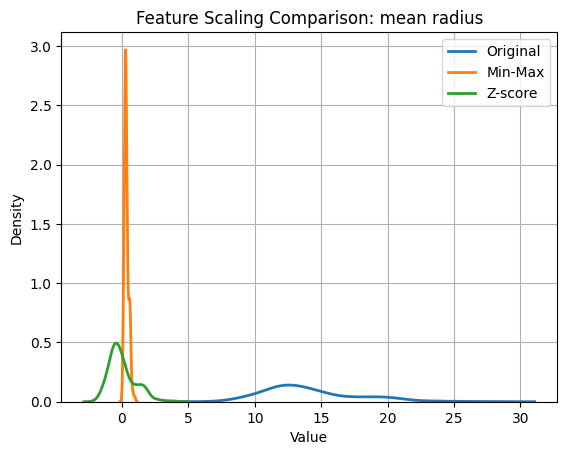

In [4]:
# STEP 3: Visualize the effect of scaling on one feature (mean radius)
import warnings                        # To suppress warnings (for cleaner output)

# FutureWarning is a harmless warning from Seaborn. Let's suppress it.
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.kdeplot(df_bc['mean radius'], label='Original', linewidth=2)
sns.kdeplot(df_minmax['mean radius'], label='Min-Max', linewidth=2)
sns.kdeplot(df_zscore['mean radius'], label='Z-score', linewidth=2)
plt.title("Feature Scaling Comparison: mean radius")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

#This plot shows how one feature, mean radius, is transformed by each method. We can see that:
#Min-Max squashes it between 0 and 1.
#Z-score centers the data around 0.
#The shape stays the same, but the scale changes."

In [7]:
# STEP 4: See how distance between samples is affected by scaling

from scipy.spatial.distance import euclidean

# Select two samples from the original data
x1_raw = df_bc.iloc[0]
x2_raw = df_bc.iloc[1]

# Corresponding scaled values
x1_minmax = df_minmax.iloc[0]
x2_minmax = df_minmax.iloc[1]

x1_zscore = df_zscore.iloc[0]
x2_zscore = df_zscore.iloc[1]

# Calculate Euclidean distances
print("Euclidean Distance (Original):", euclidean(x1_raw, x2_raw))
print("Euclidean Distance (Min-Max):", euclidean(x1_minmax, x2_minmax))
print("Euclidean Distance (Z-score):", euclidean(x1_zscore, x2_zscore))
#The raw distance is much higher than the scaled distances.
#Algorithms like KNN or KMeans rely heavily on distance, so unscaled data can cause features with large ranges to dominate the result.

Euclidean Distance (Original): 341.7302620944424
Euclidean Distance (Min-Max): 1.4998292601165726
Euclidean Distance (Z-score): 10.318497148935617
